<a href="https://colab.research.google.com/github/liz-robson/data-analysis-with-python/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import calendar

In [19]:
# 1 Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'],  index_col='date')


value    1201
dtype: int64

In [65]:
# 2 Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

clean_df = df[
    (df['value'] <= (df['value'].quantile(0.975))) &
    (df['value'] >= (df['value'].quantile(0.025)))
]


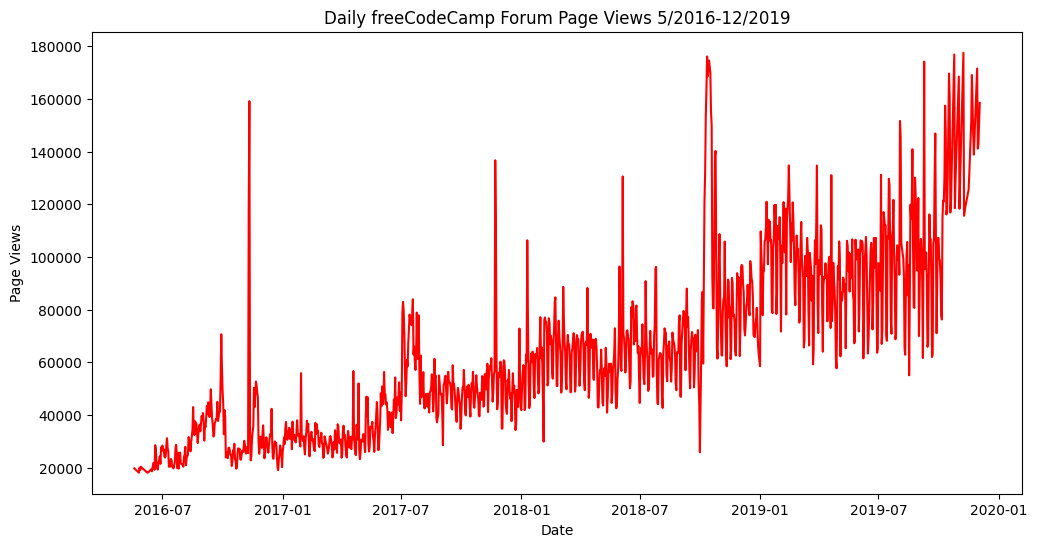

In [31]:
# 3 Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

def draw_line_plot(data) :

  # Plotting the data
  plt.figure(figsize=(12,6))
  plt.plot(clean_df.index, clean_df['value'], color='red', linestyle='-')
  plt.xlabel('Date')
  plt.ylabel('Page Views')
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


draw_line_plot(clean_df)






In [83]:
# 4 Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot(clean_df):

  # Convert date values to dateformat and set it as index
  clean_df.index = pd.to_datetime(clean_df.index)

  clean_df['Year'] = clean_df.index.year
  clean_df['Month'] = clean_df.index.month


  clean_df['Month_Name'] = clean_df['Month'].apply(lambda x: calendar.month_abbr[x])


  print(clean_df)



  # clean_df = clean_df.sort_values(by=['month'])

  # sns.barplot(data=clean_df, y='value', x='year', hue='month_name')
  # plt.xlabel('Years')
  # plt.ylabel('Average Page Views')
  # plt.legend(title='Months')

draw_bar_plot(clean_df)



             value  Year  Month month_name Month_Name
date                                                 
2016-05-19   19736  2016      5        May        May
2016-05-26   18060  2016      5        May        May
2016-05-27   19997  2016      5        May        May
2016-05-28   19044  2016      5        May        May
2016-05-29   20325  2016      5        May        May
...            ...   ...    ...        ...        ...
2019-11-24  138875  2019     11        Nov        Nov
2019-11-29  171584  2019     11        Nov        Nov
2019-11-30  141161  2019     11        Nov        Nov
2019-12-01  142918  2019     12        Dec        Dec
2019-12-03  158549  2019     12        Dec        Dec

[1238 rows x 5 columns]


<ipython-input-83-bad3e84b69b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Year'] = clean_df.index.year
<ipython-input-83-bad3e84b69b7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Month'] = clean_df.index.month
<ipython-input-83-bad3e84b69b7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us